In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

#librerias para relizar aprendizaje automatico 
##para separar el conjunto de datos en entrenamiento y test 
from sklearn.model_selection import train_test_split 

#construir el modelo con el algoritmo de regresion lineal
from sklearn.linear_model import LinearRegression,Ridge

#para determinar el rendimiento del modelo con las metricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#para sacar un reporte estadistico que podemos usar para determinar la importancia de las variables explicativas 
import statsmodels.api as sm

#Con este paquete crearemos un modelo lineal. 
import statsmodels.formula.api as smf



In [2]:
sales = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/kc_house_data.csv')

In [3]:
train_data = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/wk3_kc_house_train_data.csv')

In [13]:
(len(train_data) / len(sales)) * 100

45.16263360014806

In [14]:
valid_data = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/wk3_kc_house_valid_data.csv')

In [15]:
(len(valid_data) / len(sales)) * 100

44.57965113589044

In [16]:
test_data = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/wk3_kc_house_test_data.csv')

In [17]:
(len(test_data) / len(sales)) * 100

10.257715263961504

In [18]:
set_1 = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/wk3_kc_house_set_1_data.csv')

In [19]:
set_2 = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/wk3_kc_house_set_2_data.csv')

In [20]:
set_3 = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/wk3_kc_house_set_3_data.csv')

In [21]:
set_4 = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/wk3_kc_house_set_4_data.csv')

# --------------------------------------------------------------------------------

En esta tarea, ejecutaremos la regresión ridge varias veces con diferentes penalizaciones L2 para ver cuál produce el mejor ajuste. Revisaremos el ejemplo de la regresión polinómica para ver el efecto de la regularización L2. En particular:

Utilizar una implementación pre-construida de regresión para ejecutar la regresión polinomial

Utilizar matplotlib para visualizar regresiones polinómicas

Utilizar una implementación pre-construida de regresión para ejecutar la regresión polinómica, esta vez con penalización L2

Utiliza matplotlib para visualizar regresiones polinómicas con regularización L2

Elija la mejor penalización L2 utilizando validación cruzada.

Evalúe el ajuste final utilizando datos de prueba.


1. Copy and paste an equivalent of ‘polynomial_sframe’ function from Module 3 (Polynomial Regression). This function accepts an array ‘feature’ (of type  pandas.Series) and a maximal ‘degree’ and returns an data frame (of type  pandas.DataFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [22]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    import pandas
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pandas.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature ** power
    return poly_dataframe

In [23]:
polynomial_dataframe(sales['price'],5).head(5)

,power_1,power_2,power_3,power_4,power_5
19452,142000.0,2.016400e+10,2.863288e+15,4.065869e+20,5.773534e+25
15381,276000.0,7.617600e+10,2.102458e+16,5.802783e+21,1.601568e+27
860,245000.0,6.002500e+10,1.470612e+16,3.603001e+21,8.827352e+26
18379,265000.0,7.022500e+10,1.860962e+16,4.931551e+21,1.306861e+27
4868,228000.0,5.198400e+10,1.185235e+16,2.702336e+21,6.161327e+26


2. For the remainder of the assignment we will be working with the house Sales data as in Module 3 (Polynomial Regression). Load in the data and also sort the sales data frame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [24]:
sales = sales.sort_values(['sqft_living','price'])

3. Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5:

In [25]:
l2_small_penalty = 1.5e-5

In [26]:
polynomial_dataframe(sales['sqft_living'],15).head(5)

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,-5315590925028654848,8005133933292429824,-2800912632598854656,-607924210447579136,8169419707297566720,7948473681471741952,-785641586888785920,-6475131313233297408
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,759807991618519296,4427795793208865280,-3475779072869940224,5233828197790730240,-391694556932730880,2646966524565987328,1700178182809075712,1876629133233258496
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,-7942643919429238784,7061338705255727104,8530817309291315200,-4916379442181308416,-5103036584232484864,-2245774268841328640,-4843994769065508864,3956395126061793280
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,-6845471433603153920,-9223372036854775808,0,0,0,0,0,0
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,245347910523003136,3451964735423464960,-346070565645933568,-5840312085947230208,-8772192453144932352,-8507403090256568320,2526728067657646080,7746510479875735552


Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1.5e-5) to make the solution numerically stable. (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

With the L2 penalty specified above, fit the model and print out the learned weights. Add "alpha=l2_small_penalty" and "normalize=True" to the parameter list of linear_model.Ridge:

In [27]:


poly15_data = polynomial_dataframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [28]:
model.coef_

array([ 7.01020132e+01,  1.37941144e-02,  8.65543688e-06, -6.27671473e-10,
       -1.94650224e-14, -1.57815966e-16, -4.60871912e-16,  3.42228860e-16,
       -1.99319710e-16, -2.50411580e-16,  2.16777428e-16,  6.76179392e-16,
        4.48006670e-16, -4.08142514e-16,  6.70601594e-17])

In [29]:
model.intercept_

227788.20029745833

**4. Quiz Question: What’s the learned value for the coefficient of feature power_1?**

# Observe Overfitting

5. Recall from Module 3 (Polynomial Regression) that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Module 3.

In [30]:
l2_small_penalty=1e-9

8. Quiz Question: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1? (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

In [31]:
def get_poly_model(set_data, l2_small_penalty):
    poly15_data = polynomial_dataframe(set_data['sqft_living'], 15)
    poly15_features = poly15_data.columns # get the name of the features
    poly15_data['price'] = set_data['price'] # add price to the data since it's the target
    model15 = Ridge(alpha=l2_small_penalty, normalize=True)
    model15.fit(poly15_data[poly15_features],poly15_data['price'])
    return poly15_data, model15
    

def get_coef(set_data, l2_small_penalty):
    poly15_data, model15 = get_poly_model(set_data, l2_small_penalty)
    return model15.coef_, model.intercept_

def plot_fitted_line(set_data, l2_penalty):
    poly15_data, model15 = get_poly_model(set_data, l2_penalty)
    plt.plot(poly15_data['power_1'], poly15_data['price'],'.')
    plt.plot(poly15_data['power_1'], model15.predict(poly15_data.iloc[:,0:15]),'-')

set 1
power 1 = 62.38577180038298


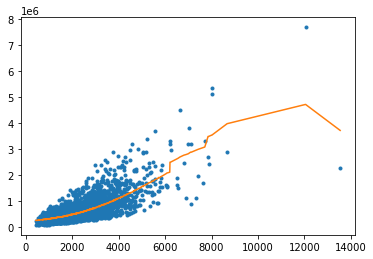

In [32]:
print('set 1')
set1_coef = get_coef(set_1, l2_small_penalty)
print('power 1 = '+str(set1_coef[0][0]))
plot_fitted_line(set_1, l2_small_penalty)

set 2
power 1 = -219.8946861789479


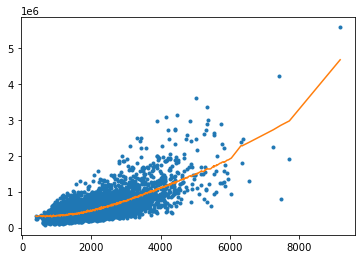

In [33]:
print('set 2')
set1_coef = get_coef(set_2, l2_small_penalty)
print('power 1 = '+str(set1_coef[0][0]))
plot_fitted_line(set_2, l2_small_penalty)

set 3
power 1 = -198.97017666597822


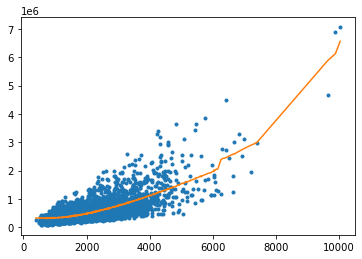

In [34]:
print('set 3')
set1_coef = get_coef(set_3, l2_small_penalty)
print('power 1 = '+str(set1_coef[0][0]))
plot_fitted_line(set_3, l2_small_penalty)

set 4
power 1 = -34.82482021560476


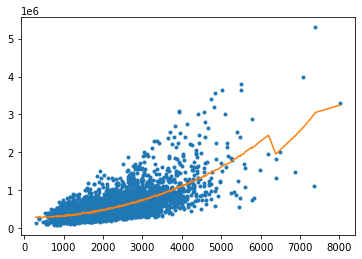

In [35]:
print('set 4')
set1_coef = get_coef(set_4, l2_small_penalty)
print('power 1 = '+str(set1_coef[0][0]))
plot_fitted_line(set_4, l2_small_penalty)

**QUIZ QUESTION: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?** 


# Ridge regression comes to rescue

9. Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

In [41]:
l2_large_penalty=1.23e2

set 1
power 1 = 2.333022928259653


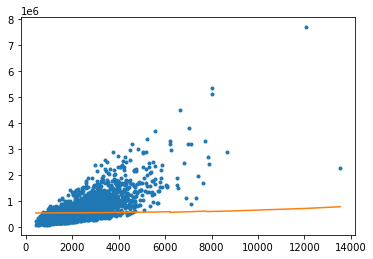

In [42]:
print('set 1')
set1_coef = get_coef(set_1, l2_large_penalty)
print('power 1 = '+str(set1_coef[0][0]))
plot_fitted_line(set_1, l2_large_penalty)

set 2
power 1 = 2.107722686907466


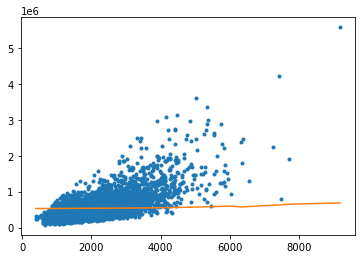

In [43]:
print('set 2')
set1_coef = get_coef(set_2, l2_large_penalty)
print('power 1 = '+str(set1_coef[0][0]))
plot_fitted_line(set_2, l2_large_penalty)

set 3
power 1 = 2.311236407795472


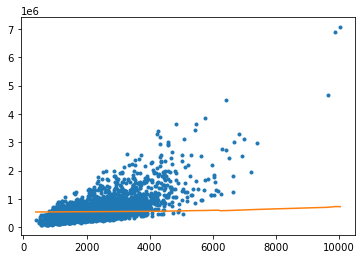

In [44]:
print('set 3')
set1_coef = get_coef(set_3, l2_large_penalty)
print('power 1 = '+str(set1_coef[0][0]))
plot_fitted_line(set_3, l2_large_penalty)

set 4
power 1 = 2.1001837846924767


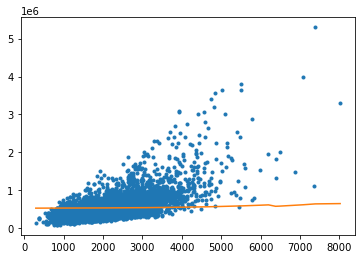

In [45]:
print('set 4')
set1_coef = get_coef(set_4, l2_large_penalty)
print('power 1 = '+str(set1_coef[0][0]))
plot_fitted_line(set_4, l2_large_penalty)

# Selecting an L2 penalty via cross-validation


Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

...

Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

13. To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and randomly shuffle the remainder. Le'ts call the shuffled data 'train_valid_shuffled'.

For the purpose of this assignment, let us download the csv file containing pre-shuffled rows of training and validation sets combined:

In [55]:
train_valid_shuffled = pd.read_csv('C:/Users/XMX5634/Documents/theory-of-ML-algorithms/Datasets/wk3_kc_house_train_valid_shuffled.csv')

In [47]:
test_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,6669080120,20141215T000000,405000.0,4,2.50,1980,5020,2.0,0,0,...,7,1980,0,2007,0,98056,47.5147,-122.190,1980,5064
2213,2855000110,20140808T000000,388000.0,3,2.50,2198,6222,2.0,0,2,...,8,2198,0,2010,0,98198,47.3906,-122.304,2198,7621
2214,3345700207,20150502T000000,608500.0,4,3.50,2850,5577,2.0,0,0,...,8,1950,900,2014,0,98056,47.5252,-122.192,2850,5708
2215,6056111067,20140707T000000,230000.0,3,1.75,1140,1201,2.0,0,0,...,8,1140,0,2014,0,98108,47.5637,-122.295,1210,1552


14. Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k) - 1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k) - 1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [48]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print (i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


Let us familiarize ourselves with array slicing with Pandas. To extract a continuous slice from a DataFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of train_valid_shuffled. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

If the observations are grouped into 10 segments, the segment i is given by

In [49]:
n

19396

In [53]:
train_valid_shuffled[0:1939].append(train_valid_shuffled[3878+1:n])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4,2.50,2800,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580,5900
1,1703050500,20150321T000000,645000.0,3,2.50,2490,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2,5700002325,20140605T000000,640000.0,3,1.75,2340,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360,4725
3,475000510,20141118T000000,594000.0,3,1.00,1320,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700,5000
4,844001052,20150128T000000,365000.0,4,2.50,1904,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560,12426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19391,2473450870,20141006T000000,325000.0,3,2.25,2480,8755,2.0,0,0,...,8,2480,0,1979,0,98058,47.4543,-122.125,2280,9940
19392,9328500630,20150302T000000,545000.0,3,2.25,1670,6240,1.0,0,0,...,8,1240,430,1974,0,98008,47.6413,-122.113,1910,7000
19393,5631500254,20141007T000000,519900.0,4,2.50,2403,6172,2.0,0,0,...,9,2403,0,1999,0,98028,47.7361,-122.234,2380,6075
19394,4139480190,20140916T000000,1153000.0,3,3.25,3780,10623,1.0,0,1,...,11,2650,1130,1999,0,98006,47.5506,-122.101,3850,11170


In [51]:
start = (n*i)/10
end = (n*(i+1))/10
train_valid_shuffled[1939:3878]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1939,7857000716,20150313T000000,334998.0,2,1.00,1800,5182,1.0,0,0,...,6,900,900,1942,0,98108,47.5508,-122.300,1570,5876
1940,9527000330,20140811T000000,508000.0,6,2.75,2890,7500,1.0,0,0,...,8,1830,1060,1976,0,98034,47.7099,-122.230,1880,7500
1941,1310440470,20150113T000000,441000.0,3,2.50,2740,7923,2.0,0,0,...,9,2740,0,1998,0,98058,47.4349,-122.105,2740,8815
1942,1118000340,20150408T000000,3000000.0,5,3.75,4590,11265,2.0,0,0,...,11,3450,1140,1927,0,98112,47.6389,-122.288,3870,8996
1943,3121500020,20140702T000000,700000.0,3,2.50,2490,23891,2.0,0,0,...,9,2490,0,1993,0,98053,47.6716,-122.029,2900,34705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,3975400085,20140624T000000,850000.0,4,3.00,3330,4000,1.0,0,0,...,8,1790,1540,1958,0,98103,47.6559,-122.344,1610,4000
3874,1310970380,20140519T000000,296500.0,3,2.75,2170,7900,1.0,0,0,...,8,1380,790,1978,0,98032,47.3620,-122.277,2170,7700
3875,6071200195,20150408T000000,621000.0,4,2.50,2030,9905,1.0,0,0,...,8,2030,0,1959,0,98006,47.5518,-122.184,2130,10008
3876,3438500037,20150405T000000,545000.0,5,4.00,1680,7268,1.0,0,0,...,8,1370,310,2008,0,98106,47.5571,-122.356,2040,8259


15. Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

For each i in [0, 1, ... k-1]:

Compute starting and ending indices of segment i and call 'start' and 'end'

Form validation set by taking a slice (start:end+1) from the data.

Form training set by appending slice (end+1:n) to the end of slice (0:start).

Train a linear model using training set just formed, with a given l2_penalty

Compute validation error (RSS) using validation set just formed

e.g. in Python:

In [66]:
import numpy as np
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):    
    rss_sum = 0
    n = len(data)
    for i in range(k):
        start = int((n*i)/k)
        end = int((n*(i+1))/k-1)
        validation_set = data[start:end+1]
        training_set = data[0:start].append(data[end+1:n]) 
        model = Ridge(alpha=l2_penalty, normalize=True)
        model.fit(training_set[features_list], training_set[output_name])
     
        predictions = model.predict(validation_set[features_list])
        residuals = validation_set[output_name] - predictions
        rss = sum(residuals * residuals)
        rss_sum += rss
        
    validation_error = rss_sum / k # average = sum / size or you can use np.mean(list_of_validation_error)
    return validation_error  

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:

* We will again be aiming to fit a 15th-order polynomial model using the sqft_living input
* For l2_penalty in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: np.logspace(1, 7, num=13).)
* Run 10-fold cross-validation with l2_penalty
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use train_valid_shuffled when generating polynomial features!

In [69]:
poly_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
my_features = poly_data.columns
poly_data['price'] = train_valid_shuffled['price']

val_err_dict = {}
for l2_penalty in np.logspace(1, 7, num=13):
    val_err = k_fold_cross_validation(10, l2_penalty, poly_data, 'price', my_features)  
    
    val_err_dict[l2_penalty] = val_err
    
val_err_dict

{10.0: 206956194229051.2,
 31.622776601683793: 241108256650438.4,
 100.0: 257260867876359.94,
 316.22776601683796: 263157473257590.1,
 1000.0: 265112635027120.2,
 3162.2776601683795: 265740379779639.7,
 10000.0: 265939850773897.6,
 31622.776601683792: 266003025551996.1,
 100000.0: 266023012836160.3,
 316227.7660168379: 266029334337348.6,
 1000000.0: 266031333468258.25,
 3162277.6601683795: 266031965658631.25,
 10000000.0: 266032165575747.66}

In [71]:
print(min(val_err_dict.items(), key=lambda x: x[1]))

(10.0, 206956194229051.2)


**17. Quiz Question: What is the best value for the L2 penalty according to 10-fold validation?**


18. Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of l2_penalty. This way, your final model will be trained on the entire dataset.

In [81]:

df = pd.DataFrame({'l2_penalty': val_err_dict.keys(),
                  'validation_error' : val_err_dict.values()})


In [85]:
df

,l2_penalty,validation_error
0,1.000000e+01,2.069562e+14
1,3.162278e+01,2.411083e+14
2,1.000000e+02,2.572609e+14
3,3.162278e+02,2.631575e+14
4,1.000000e+03,2.651126e+14
5,3.162278e+03,2.657404e+14
6,1.000000e+04,2.659399e+14
7,3.162278e+04,2.660030e+14
8,1.000000e+05,2.660230e+14
9,3.162278e+05,2.660293e+14


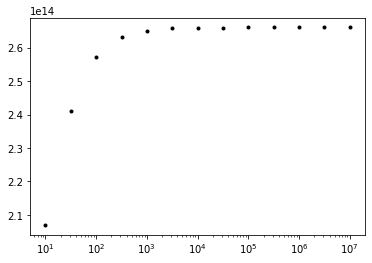

In [83]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.

plt.plot(df['l2_penalty'],df['validation_error'],'k.')
plt.xscale('log')

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of l2_penalty. This way, your final model will be trained on the entire dataset.

In [87]:
poly_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)
features_list = poly_data.columns
poly_data['price'] = train_valid_shuffled['price']
l2_penalty_best = 206956194229051.2

model = Ridge(alpha=l2_penalty_best, normalize=True).fit(poly_data[features_list], poly_data['price'])

In [92]:
poly_test = polynomial_dataframe(test_data['sqft_living'], 15)
predictions = model.predict(poly_test[features_list])
errors = predictions-test_data['price']
rss = (errors*errors).sum()
print (rss)

284682324759334.6
